In [23]:
from tabulate import tabulate

Music Downloaded!


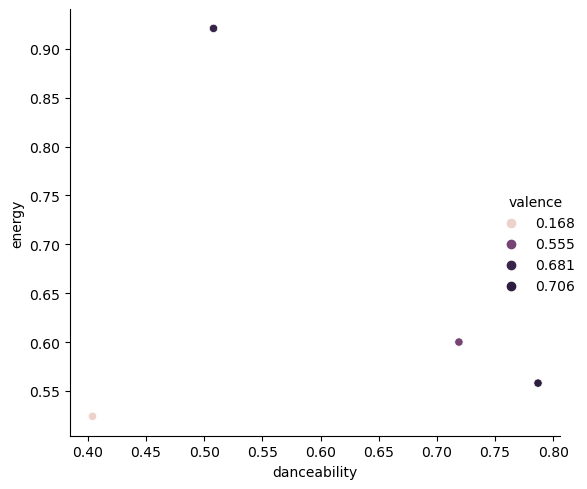

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import util
from IPython.display import clear_output
import time

# Spotify API credentials and user information
client_id = "your_client_id"
client_secret = "your_client_secret"
scope = "playlist-read-private"
redirect_uri = 'http://localhost:60123/callback'  
username = "your_username"

# Authorization and Spotify client setup
manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)
token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)
spt = spotipy.Spotify(auth=token)

def get_songs_features(ids):
    track_info = sp.track(ids)
    features = sp.audio_features(ids)

    name = track_info['name']
    album = track_info['album']['name']
    artist = track_info['album']['artists'][0]['name']
    release_date = track_info['album']['release_date']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    ids = track_info['id']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    time_signature = features[0]['time_signature']

    tracks = [name, album, artist, ids, release_date, popularity, length, danceability, acousticness,
              energy, instrumentalness, liveness, valence, loudness, speechiness, tempo, key, time_signature]
    columns = ['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length', 'danceability', 'acousticness',
               'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key', 'time_signature']

    return tracks, columns

def download_playlist(id_playlist, n_songs):
    songs_id = []
    tracks = []
    col = []

    for i in range(0, n_songs, 100):
        playlist = spt.playlist_tracks(id_playlist, limit=100, offset=i)

        for songs in playlist['items']:
            songs_id.append(songs['track']['id'])

    counter = 1
    for ids in songs_id:
        time.sleep(.6)
        track, col = get_songs_features(ids)
        tracks.append(track)
        col.append(col)

        print(f"Song {counter} Added:")
        print(f"{track[0]} By {track[2]} from the album {track[1]}")
        clear_output(wait=True)
        counter += 1

    clear_output(wait=True)
    print("Music Downloaded!")

    return tracks, col

# Download playlist data
tracks, columns = download_playlist("https://open.spotify.com/playlist/0OfMNAgkRdWBuHa2TPfbjb?si=091e11702f8447e8", 5)

# Create a DataFrame
df1 = pd.DataFrame(tracks, columns=['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
                                    'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness',
                                    'valence', 'loudness', 'speechiness', 'tempo', 'key', 'time_signature'])

# Display the DataFrame
df1

# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of data for demonstration
subset_df = df1.iloc[1:5]

# Create a scatter plot
fgrid = sns.relplot(x="danceability", y="energy", hue="valence", data=subset_df, sizes=(20, 600))
plt.tight_layout()
plt.show()

import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")


In [25]:
import json
import time
manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)
token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri) 
spt = spotipy.Spotify(auth=token)
playlist_url="https://open.spotify.com/playlist/0OfMNAgkRdWBuHa2TPfbjb?si=429102d43c334256"

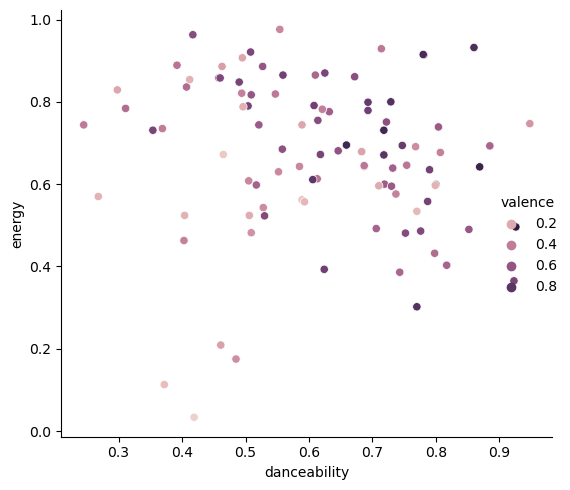

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
name = df1[1:5]
album=df1[1:5]
fgrid = sns.relplot(x = "danceability", 
                    y = "energy", 
                    hue = "valence", 
                    data = df1,
                   sizes=(20,600))
plt.tight_layout()